# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: fill this in based on where you saved the training and testing data
training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
#train_sizes, train_coords = train['sizes'], train['coords']
#test_sizes, test_coords = test['sizes'], test['coords']

In [2]:
print (X_train.shape,y_train.shape,X_test.shape, y_test.shape)
#print (X_train[8000])
print (np.unique(np.array(y_train)).size)

(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)
43


In [3]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape[0]

# TODO: number of testing examples
n_test = X_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape[1:4]

# TODO: how many classes are in the dataset
n_classes = np.unique(np.array(y_train)).size #What is this?

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Data exploration visualization goes here.

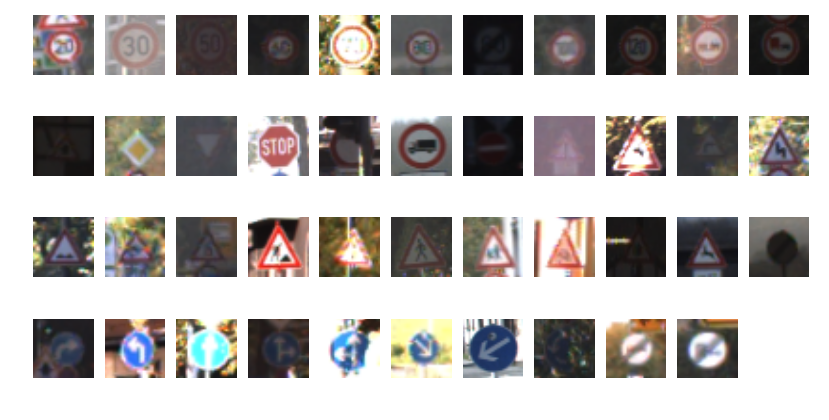

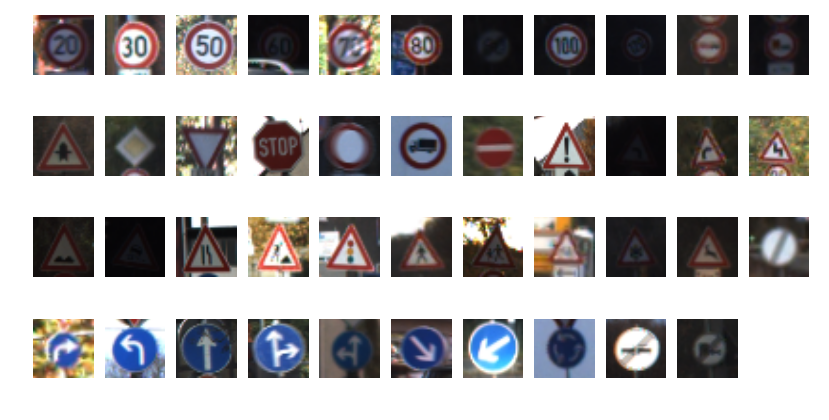

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

def get_images(images, labels):
    selected = []
    for i in range(43):
        y=np.where(labels==i)[0][0]
        selected.append(images[y])
    
    return selected

def draw_images(fig,images):
    #Draw images
    num_rows = 4
    num_cols = 11
    fig = plt.figure(fig,figsize=(10,5),dpi=32)
    gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2,hspace=0.2)

    ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

    for i,im in enumerate(images):
        ax[i].imshow(im)
        ax[i].axis('off')

    temp = ax[i+1].axis('off') #44th image off   
    
images = get_images(X_train, y_train)
draw_images(1,images)
images = get_images(X_test, y_test)
draw_images(2,images)


In [5]:
# Display how many records for each class of image
#np.bincount(y_train),np.bincount(y_test)
print(X_test.shape)

(12630, 32, 32, 3)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

For the desing of the CNN, I used the TFlearn deep learning library built on top of Tensorflow. It is designed to provide a higher-level API to Tensorflow in order to facilitate and speed-up experimentations, while remaining fully transparent and compatible with it, http://tflearn.org/

Inspired by tflearn example convnet_cifar10

In [6]:
import tensorflow as tf
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

#g = tf.Graph()
#with tf.Graph().as_default():
    #network = input_data(shape=[None, 32, 32, 3])
network = input_data(shape=[None, 32, 32, 3], data_preprocessing=img_prep)
    #network = input_data(shape=[None, 32, 32, 3], data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu', regularizer="L2")
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
network = conv_2d(network, 64, 3, activation='relu', regularizer="L2")
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 43, activation='softmax')
network = regression(network, optimizer='adam', learning_rate=0.0001,
                            loss='categorical_crossentropy', name='target')
    
model = tflearn.DNN(network, tensorboard_verbose=0,checkpoint_path='traffic-sign.ckpt')
print ("Network ready")

Network ready


## Training
TFLearn provides a model wrapper 'DNN' that can automatically perform neural network classifier tasks, such as training, prediction, save/restore, etc... 

I experimented with various sets of hyperparameters; initially with a small number of epochs to get an intuition of how the training proceeds and to minimize the range of the hyperparameters
The results presented correspond to a training with 30 epochs (the network will see all data 10 times) with a batch size of 64. Final training output is depicted below, after the "training" cell

| Adam | epoch: 030 | loss: 1.66684 - acc: 0.9215 | val_loss: 0.01794 - val_acc: 0.9969 -- iter: 35288/35288

accuracy = 0.9215
mismatches =  527
**

Test accuracy is =  [0.95328582724407374]

mismatches =  590

In [7]:
# Training
trainY = to_categorical(y_train,43)
X_prep = np.array(X_train, dtype=float)

#with tf.Graph().as_default():
    #model.fit(X_prep, trainY, n_epoch=20, shuffle=True, validation_set=0.10, batch_size=64,
                #snapshot_step=100,show_metric=True,run_id='trafficsign_lr0001-batch64-epoch20')
model.fit(X_prep, trainY, n_epoch=30, shuffle=True, validation_set=0.10, batch_size=64,
                snapshot_step=100,show_metric=True,run_id='trafficsign_lr0001-batch64-epoch30')


model.save("traffic-sign.tflearn")
print ("model trained")


Training Step: 16559  | total loss: 1.85166 | time: 0.292s
| Adam | epoch: 030 | loss: 1.85166 - acc: 0.9128 -- iter: 35264/35288
Training Step: 16560  | total loss: 1.66684 | time: 5.923s
| Adam | epoch: 030 | loss: 1.66684 - acc: 0.9215 | val_loss: 0.01794 - val_acc: 0.9969 -- iter: 35288/35288
--
model trained


## Test Model 

In [20]:
#model.save("traffic-sign.tflearn")

In [7]:
model.load("traffic-sign.tflearn")

In [ ]:
#load model saved earlier. 
#model.load("traffic-sign.tflearn")

In [8]:
testY = to_categorical(y_test, 43)
Xtest = np.array(X_test, dtype=float)
#with tf.Graph().as_default():
val = model.evaluate(Xtest,testY)
print(val)

[0.95328582724407374]


In [9]:
#with tf.Graph().as_default():
results=model.predict(Xtest)

In [10]:
#compare predicted results and print images that are not correct

y_out = np.array(results).argmax(1) #argmax converts to_categorical
incorrects = []
y_errors = []
for i,test in enumerate(y_test):
    if(y_out[i] != test):
        #print (i, test, y_out[i])
        incorrects.append([i, test, y_out[i]])
        y_errors.append(test)
        
print("mismatches = ", len(incorrects))

# Display how many errors for each class of image
np.bincount(np.array(y_errors))

mismatches =  590


array([14, 30, 15, 33, 35, 55, 33, 50, 15,  5, 11,  4,  9,  3,  0,  1,  2,
        5, 51,  1,  3, 16,  4, 16,  5, 34, 12, 30,  1,  6, 36, 10,  0,  0,
        1,  1,  5,  0, 15,  6,  4, 13])

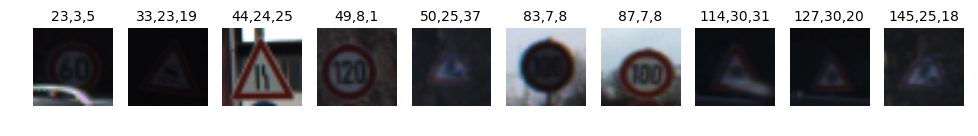

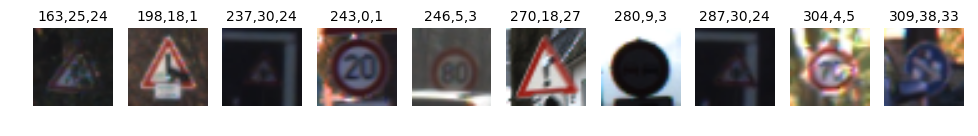

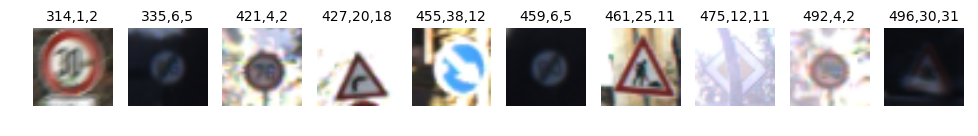

In [11]:
#draw some incorrect results
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

def draw_mismatches(fig,selected):
    #Draw images
    num_rows = 1
    num_cols = 10
    fig = plt.figure(fig,figsize=(12,12),dpi=32)
    gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2,hspace=0.2)

    ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

    cnt=0
    for [i,expected,predicted] in selected:
        #print (i,expected,predicted)
        im = X_test[i]
        #im= Xtest[i]
        ax[cnt].imshow(im)
        ax[cnt].axis('off')
        ax[cnt].set_title(str(i) +',' + str(expected) + ',' + str(predicted),fontsize=10 )
        cnt += 1
        
draw_mismatches(1,incorrects[0:10])
draw_mismatches(2,incorrects[10:20])
draw_mismatches(3,incorrects[20:30])

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**
I scaled input data with the mean of training set and standard dev of the training set.


In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I splitted the training data into 90% training and 10% validation data. Test set was only used for measuring the performance of the network against unseen data. I tried image augmentation by flipping the image, creating a blur image and by rotating the images.

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
 architecture: 

I designed (partly borrowed from tflearn example on CIFAR) a 7 layer deep neural network after the input layer.

1 layer: convolution layer of 32 filters of size 3x3, stride of 1 and same padding . After the convolution a Relu activation and L2 regularization follow

2 layer: max pooling layer with a kernel size of 2

3 and 4 layers: convolution layers of 64 filters of size 3x3, stride of 1 and same padding. After the convolutions there is a Relu activation and L2 regularization

5 layer: max pooling with a kernel size of 2

6 layer: fully connected layer with 512 units and relu activation applied to this layer

There is a 50% dropout after layer 6. 

7 layer: fully conected with 43 (number of classes) units with softmax activation.

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the ADAM Optimizer. I tried learning rate of .001, .002 but later settled for .0001 as that gave best results. my loss function was categorical_crossentropy.

I selected batch size of 64 which gave the best results. I have tried batch sizes of 128, 96 and 64. 

I selected number of epochs 30. I have tried many epochs number.

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

I search the web regarding training a DNN on colored images and I found tflearn which facilitates fast DNN modeling.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

I have selected 5 images from the web, https://www.gov.uk/guidance/traffic-sign-images#images-in-jpg-format

(5, 32, 32, 3)


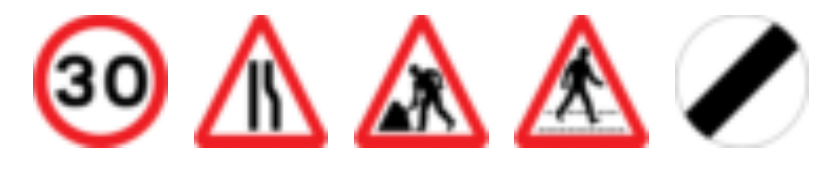

In [12]:
### Load the images and plot them here.
from scipy.misc import imread
from scipy.misc import imresize
from scipy import misc


### Feel free to use as many code cells as needed.
myimages_dir = "/home/akis/Desktop/traffic_signs/"
myfiles = [1, 24, 25, 27, 32]
images = []
num_rows = 1
num_cols = len(myfiles)
fig = plt.figure(1,figsize=(10,5),dpi=32)
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2,hspace=0.2)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

#basewidth = 32
for i,file in enumerate(myfiles):
    
    im = imread(myimages_dir + str(file) + '.jpg')
    im = imresize(im, [32, 32])
    plt.imshow(im)
    
    images.append(im)
    ax[i].imshow(im )
    ax[i].axis('off')


images = np.array(images)
print (images.shape)

In [11]:
#model.load("traffic-sign.tflearn")

In [17]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
images = np.array(images, dtype=float)
#with g.as_default():
results=model.predict(images)
    
#compare predicted results and print images 
y_out = np.array(results).argmax(1) #argmax converts to_categorical
incorrects = []
y_errors = []
for i,expected in enumerate(myfiles):
    accuracy = int(results[i][y_out[i]]*100)
    if(y_out[i] != expected):
        print ('Incorrect: For image', i+1, 'expected', expected, 'predicted', y_out[i], 'with',str(accuracy) +'% accuracy')
    else:
        print ("Correctly predicted image", i+1, 'as', expected,'with',str(accuracy) +'% accuracy')


Incorrect: For image 1 expected 1 predicted 18 with 56% accuracy
Incorrect: For image 2 expected 24 predicted 18 with 56% accuracy
Incorrect: For image 3 expected 25 predicted 18 with 56% accuracy
Incorrect: For image 4 expected 27 predicted 18 with 56% accuracy
Incorrect: For image 5 expected 32 predicted 18 with 56% accuracy


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

The model does not perform satisfactory. I am not sure about the reason, I can only suspect that the reason is the difference in the intensities of new images with respect to the train and test sets 

In [18]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

correct = tf.nn.in_top_k(results, myfiles, 5)
total_correct = tf.reduce_sum(tf.cast(correct, tf.int32))
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.initialize_all_variables()

# Launch the graph.
sess = tf.Session()
sess.run(init)
print (sess.run(correct))
print(sess.run(total_correct))
print(sess.run(accuracy))


[False False False False False]
0
0.0


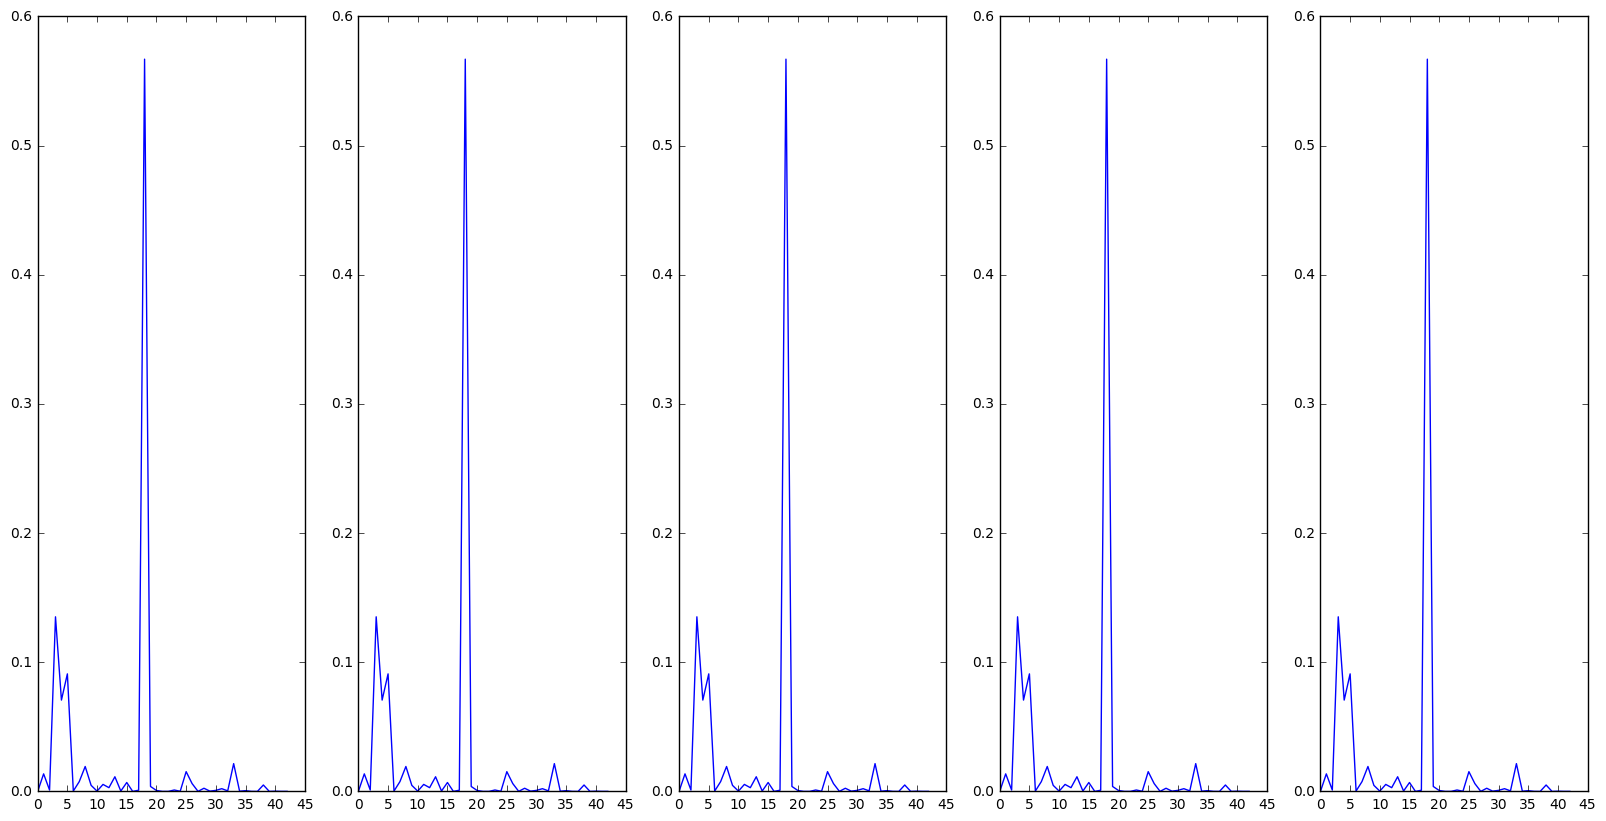

In [19]:
#visualize softmax probabilities
num_rows = 1
num_cols = int(len(myfiles))
fig = plt.figure(1,figsize=(20,10),dpi=32)
gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.2,hspace=0.2)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

for i,file in enumerate(myfiles):
    ax[i].plot(results[i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

For an unsure for me reason, the model does not perform satisfactory.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.